<a href="https://colab.research.google.com/github/M-Rathnayake/House-Price-Prediction/blob/main/housingBoston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House price prediction using machine learning

In [5]:
import pandas as pd  # for loading and manipulating data
import numpy as np #for numerical operations


df = pd.read_csv('/HousingData.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
missing = df.isnull().sum()  #finding null values
print(missing[missing>0])


CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64


<Axes: >

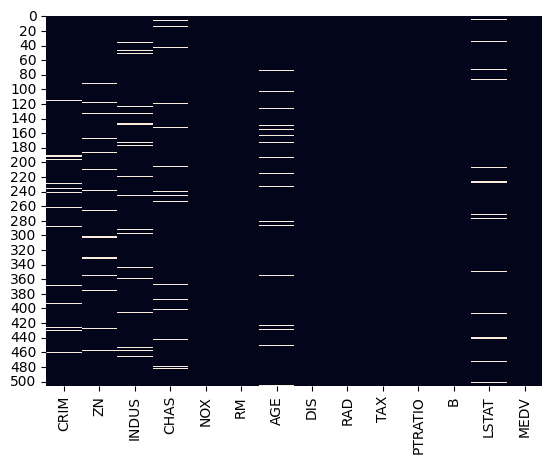

In [8]:
#missing values are greater than 5, so therefore we cannot drop them directly
#First should analyze the pattern of missing values whether they are random or systematic
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)  # Visualize missingness using a heatmap

In [11]:
#from the above output we can conclude that the missingness is moderate and scattered which is not severe.
#to foll the missing values i can use either mean or median, as a best practise i will use median which is best for skewed data (it is also robust to outliers).

df = df.fillna(df.median())
#check for null
df.isnull().sum()

#check is successfull -  all null values are handled by now

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


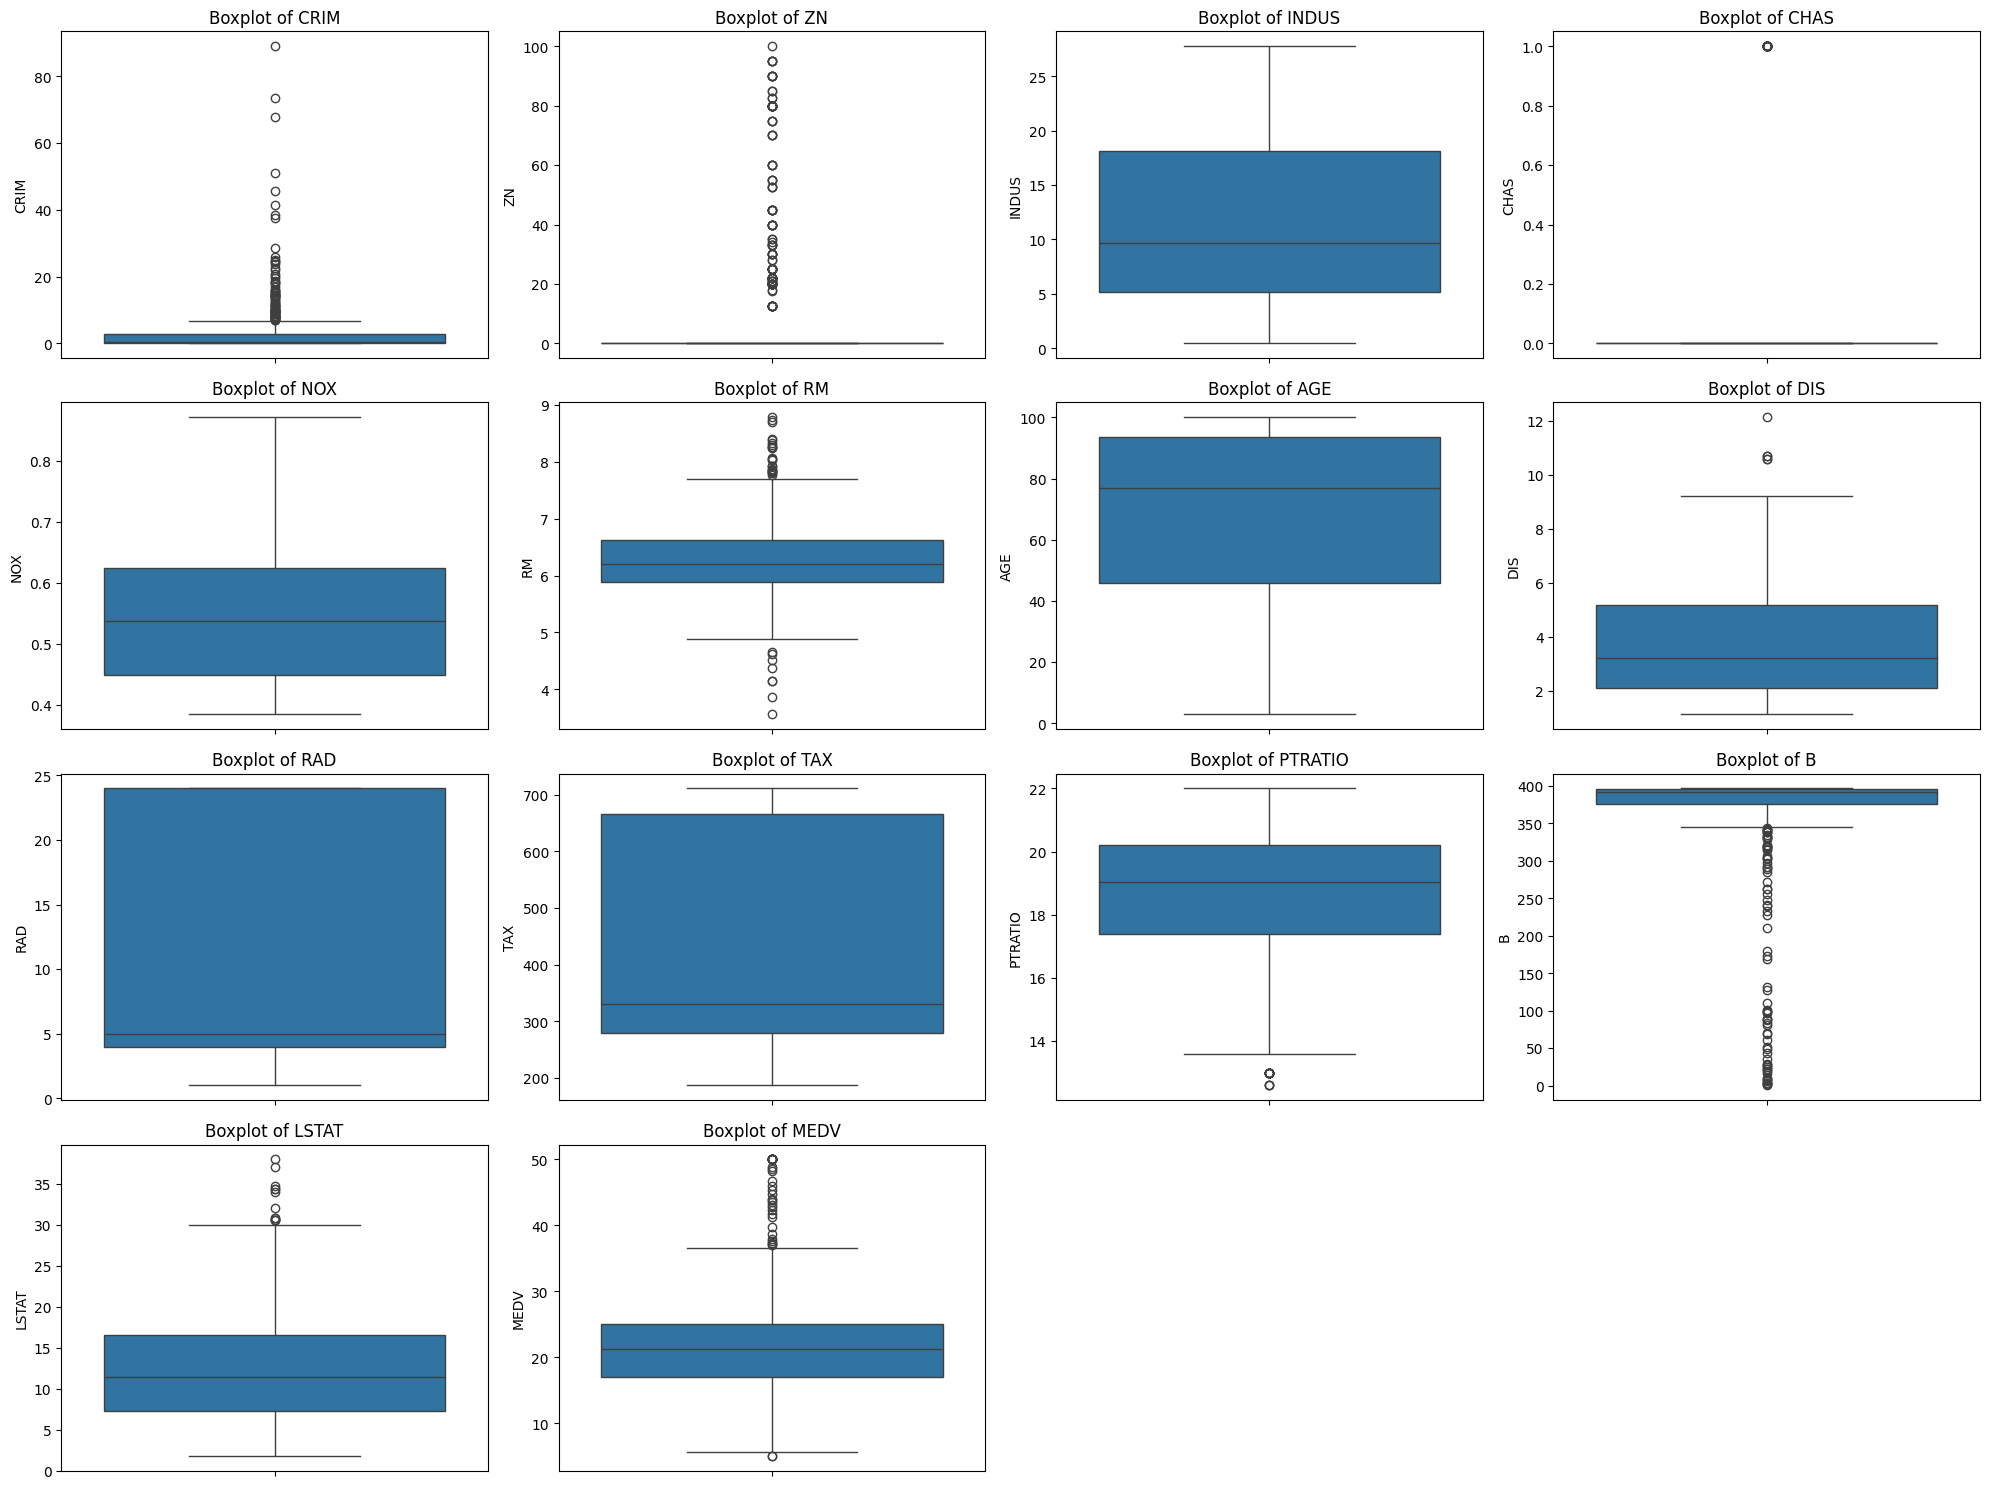

In [13]:
#now should check whether there are any outliers
#for this we can use a box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()